# Project Proposal for Lobbysts4America: Analyzing Congressional Tweets (2008-2017) for Lobbying Insights

## Description:

The project aims to analyze congressional tweets from 2008 to 2017 to gain insights into key topics, influential members, and relationships within Congress. The findings will be of interest to Lobbyists4America, a company seeking to strengthen their lobbying efforts by understanding legislative trends and member engagement on Twitter. The audience for this project includes lobbyists, policymakers, and individuals interested in understanding the dynamics of congressional discussions on social media.

## Questions:

1. What are the most discussed topics in congressional tweets during the specified period?
2. Which members of Congress are the most active on Twitter and engage with legislative topics?
3. Are there any significant connections or relationships between members based on their interactions on Twitter?

## Hypotheses:

1. Congressional tweets will cover a wide range of topics, including healthcare, economy, defense, and immigration.
2. Influential members of Congress, committee chairs, and leaders are expected to be more active on Twitter and have higher engagement with tweets related to legislation.
3. Social network analysis might reveal clusters of members who frequently interact or retweet each other, indicating potential alliances or affiliations.

## Approach:
The initial approach involves data collection, importation, and cleaning. We will then perform initial exploration to understand data distributions and patterns. Key features to be analyzed include tweet text, timestamp, user mentions, and retweet counts. We will apply natural language processing techniques to extract topics from the tweet text and identify frequent co-occurrences among members.

For the analysis, we will conduct social network analysis to uncover relationships and connections between members based on interactions. Additionally, sentiment analysis will be used to gauge the tone of congressional tweets over time. The primary evaluation metric will be the identification of significant topics, highly engaged members, and clusters of interconnected members.

In [1]:
import pandas as pd

# Import files
tweets_data = pd.read_json("tweets.json", lines=True)
users_data = pd.read_json("users.json", lines = True)

In [2]:
pd.set_option('display.max_colwidth', None)
tweets_data.head()

contributors coordinates          created_at display_text_range  \
0           NaN        None 2008-08-04 17:28:51            [0, 74]   
1           NaN        None 2008-08-06 19:04:45            [0, 25]   
2           NaN        None 2008-08-06 20:35:36            [0, 65]   
3           NaN        None 2008-08-07 13:52:52            [0, 37]   
4           NaN        None 2008-08-07 15:12:05            [0, 90]   

                                                           entities  \
0  {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}   
1  {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}   
2  {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}   
3  {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}   
4  {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}   

   favorite_count  favorited   geo         id     id_str  ...  \
0               0      False  None  877418565  877418565  ...   
1               0      False  None  879618172  879618172  ...   
2               0      False  None  879695803  879695803  ...   
3               0      False  None  880393665  880393665  ...   
4               0      False  None  880474266  880474266  ...   

                                                                                         text  \
0                  On a conference call about a weekend trip to Iraq to visit Arkansas troops   
1                                                                   Being interviewed by KTHV   
2                           Being interviewed by KARN on his Arkansas World Trade Center trip   
3                                                       On KWHN in Fort Smith, that's 1320 AM   
4  Attending a Military of the Purple Heart Ceremony at the VA Medical Center in Fayetteville   

   truncated  user_id  possibly_sensitive  extended_entities  \
0      False  5558312                 NaN                NaN   
1      False  5558312                 NaN                NaN   
2      False  5558312                 NaN                NaN   
3      False  5558312                 NaN                NaN   
4      False  5558312                 NaN                NaN   

   quoted_status_id quoted_status_id_str withheld_copyright  \
0               NaN                  NaN                NaN   
1               NaN                  NaN                NaN   
2               NaN                  NaN                NaN   
3               NaN                  NaN                NaN   
4               NaN                  NaN                NaN   

   withheld_in_countries  withheld_scope  
0                    NaN             NaN  
1                    NaN             NaN  
2                    NaN             NaN  
3                    NaN             NaN  
4                    NaN             NaN  

[5 rows x 32 columns]

In [3]:
users_data.head()

contributors_enabled                          created_at  default_profile  \
0                 False 1970-01-01 00:00:01.417384037+00:00             True   
1                 False 1970-01-01 00:00:01.240239576+00:00            False   
2                 False 1970-01-01 00:00:01.366837593+00:00            False   
3                 False 1970-01-01 00:00:01.300739574+00:00            False   
4                 False 1970-01-01 00:00:01.294329706+00:00            False   

   default_profile_image  \
0                  False   
1                  False   
2                  False   
3                  False   
4                  False   

                                                                                                                                                       description  \
0  Official Twitter page of Alaska Governor Bill Walker; honored to serve AK w/ @LtGovMallott. RTs ≠ endorsements.Tweets signed "-BW" come directly from Governor.   
1                                                                                            U.S. Senator from Minnesota. Follows, Retweets, Replies ≠ endorsement   
2                                                                   Congressman for Maryland's 4th Congressional District, former Army Aviator, father and husband   
3            Husband of 43 yrs, Dad of 4, Papaw of 6. Lifelong Arkansan. Governor of Arkansas. Former Congressman, Admin. of DEA, Under Sec. of Homeland Security.   
4                                                                                               I am proud to represent the 8th Congressional District of Georgia.   

                                                                                                                                                                                               entities  \
0                     {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'gov.alaska.gov', 'expanded_url': 'http://gov.alaska.gov', 'indices': [0, 22], 'url': 'http://t.co/NO67LyZvUR'}]}}   
1             {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'amyklobuchar.com', 'expanded_url': 'http://www.amyklobuchar.com', 'indices': [0, 22], 'url': 'http://t.co/mGGFBfggto'}]}}   
2            {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'anthonybrown.com', 'expanded_url': 'http://www.anthonybrown.com', 'indices': [0, 23], 'url': 'https://t.co/NYPWOVmoAx'}]}}   
3  {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'governor.arkansas.gov', 'expanded_url': 'http://www.governor.arkansas.gov', 'indices': [0, 23], 'url': 'https://t.co/b38CUNlZHi'}]}}   
4       {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'austinscott.house.gov', 'expanded_url': 'http://austinscott.house.gov', 'indices': [0, 22], 'url': 'http://t.co/GQwXIhub9a'}]}}   

   favourites_count  follow_request_sent  followers_count  following  ...  \
0               115                False             5870      False  ...   
1                24                False           170717      False  ...   
2                90                False             6067      False  ...   
3               440                False            25747      False  ...   
4                12                False            13048      False  ...   

   profile_text_color  profile_use_background_image  protected  \
0              333333                          True      False   
1              3D3C3D                          True      False   
2              333333                         False      False   
3              333333                         False      False   
4              11172E                          True      False   

       screen_name  statuses_count                   time_zone  \
0  AkGovBillWalker            1642                        None   
1     amyklobuchar            5567  Central Time (US & Canada)   
2  AnthonyBrownMD4            1878  Eastern Time (US & Canada)   
3    AsaHutch

In [4]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243370 entries, 0 to 1243369
Data columns (total 32 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   contributors               0 non-null        float64       
 1   coordinates                2734 non-null     object        
 2   created_at                 1243370 non-null  datetime64[ns]
 3   display_text_range         1243370 non-null  object        
 4   entities                   1243370 non-null  object        
 5   favorite_count             1243370 non-null  int64         
 6   favorited                  1243370 non-null  bool          
 7   geo                        2734 non-null     object        
 8   id                         1243370 non-null  int64         
 9   id_str                     1243370 non-null  int64         
 10  in_reply_to_screen_name    65411 non-null    object        
 11  in_reply_to_status_id      54146 non-

In [5]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   contributors_enabled                548 non-null    bool               
 1   created_at                          548 non-null    datetime64[ns, UTC]
 2   default_profile                     548 non-null    bool               
 3   default_profile_image               548 non-null    bool               
 4   description                         548 non-null    object             
 5   entities                            545 non-null    object             
 6   favourites_count                    548 non-null    int64              
 7   follow_request_sent                 548 non-null    bool               
 8   followers_count                     548 non-null    int64              
 9   following                           548 non

### Select only relevant columns to work with

In [6]:
tweets_df = tweets_data[['id', 'created_at', 'favorite_count', 'retweet_count', 'screen_name','text', 'user_id', 'entities']]
users_df = users_data[['id', 'created_at', 'description', 'favourites_count', 'followers_count', 'friends_count', 'listed_count' ,'name', 'screen_name', 'statuses_count', 'location']]

In [7]:
### Check for any duplicates users
users_df['id'].nunique()

548

#### Perform some EDA

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
users_df.describe()

id  favourites_count  followers_count  \
count                548.000           548.000          548.000   
mean   72363033893011936.000           413.912       163433.909   
std   231221286494740288.000           965.151      1597357.021   
min              5558312.000             0.000            4.000   
25%             57688816.000            32.750         8960.250   
50%            247051870.500           120.500        16732.000   
75%           1212627050.250           379.750        33081.000   
max   854715071116849152.000         12507.000     31712585.000   

       friends_count  listed_count  statuses_count  
count        548.000       548.000         548.000  
mean        2033.732      1340.648        3658.960  
std         6278.436      3567.588        4259.273  
min            0.000         0.000           0.000  
25%          368.000       426.750        1387.500  
50%          751.500       750.000        2684.000  
75%         1670.500      1257.000        4509.250  
max        92934.000     70660.000       59535.000

In [9]:
print("Min created user:", users_df['created_at'].min())
print("Max created user:", users_df['created_at'].max())

Min created user: 1970-01-01 00:00:01.177689952+00:00
Max created user: 2016-10-23 18:23:37+00:00


In [ ]:
### Seems it looks weird that the oldest account created is 1970
users_df['created_at'].hist()

The created_at column wont be neccessary for our analysis but it is important to point out that the majority of users appears
to be created in 1970 which looks like an bug from twitter API side.

In [ ]:
users_df = users_df.drop(columns=['created_at'])

In [ ]:
tweets_df.describe()

In [ ]:
### Check min, max and distribution of tweets using the created at column
print("Min created tweet:", tweets_df['created_at'].min())
print("Max created tweet:", tweets_df['created_at'].max())

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
plt.figure(figsize=(20, 10))
tweets_df.created_at.hist()

In [14]:
users_df = users_df.rename(columns={"id": "user_id"})

In [ ]:
users_df.info()

In [15]:
tweets_df = tweets_df.rename(columns={"id": "tweet_id"})

In [16]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243370 entries, 0 to 1243369
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   tweet_id        1243370 non-null  int64         
 1   created_at      1243370 non-null  datetime64[ns]
 2   favorite_count  1243370 non-null  int64         
 3   retweet_count   1243370 non-null  int64         
 4   screen_name     1243370 non-null  object        
 5   text            1243370 non-null  object        
 6   user_id         1243370 non-null  int64         
 7   entities        1243370 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 75.9+ MB


Public Tweets (.@)
RT's (starts with RT)
Mentions (has an @ symbol)

##### Move the data frames to our database

In [10]:
import sqlite3

# Connect to the SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('twitter_data.db')
cursor = conn.cursor()

In [ ]:


# Create the Users table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Users (
        user_id          INTEGER PRIMARY KEY,
        name             TEXT,
        screen_name      TEXT,
        favourites_count INTEGER,
        followers_count  INTEGER,
        statuses_count   INTEGER,
        friends_count    INTEGER,
        listed_count     INTEGER,
        location         TEXT,
        description      TEXT
    )
''')


# Create the tweets table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Tweets (
        tweet_id           INTEGER PRIMARY KEY,
        created_at         TEXT,
        favorite_count     INTEGER,
        retweet_count      INTEGER,
        text               TEXT,
        user_id            INTEGER,
        FOREIGN KEY (user_id) REFERENCES Users (user_id)
    )
''')

# Create the Hashtags table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Hashtags (
        hashtag_id  INTEGER PRIMARY KEY,
        text        TEXT,
        count       INTEGER
    )
''')

# Create the TweetHashtags junction table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS TweetHashtags (
        tweet_id   INTEGER,
        hashtag_id INTEGER,
        PRIMARY KEY (tweet_id, hashtag_id),
        FOREIGN KEY (tweet_id)   REFERENCES Tweets (tweet_id),
        FOREIGN KEY (hashtag_id) REFERENCES Hastags (hashtag_id)
    )
''')



# Create the TweetUserMention table (junction table)
cursor.execute('''
    CREATE TABLE IF NOT EXISTS TweetUserMention (
        tweet_id INTEGER,
        user_id INTEGER,
        name    TEXT,
        screen_name TEXT,
        PRIMARY KEY (tweet_id, user_id),
        FOREIGN KEY (tweet_id) REFERENCES Tweets (tweet_id),
        FOREIGN KEY (user_id) REFERENCES Users (user_id)
    )
''')

# Commit changes and close the connection
conn.commit()

In [ ]:
# Insert user_df to database
users_df.to_sql('Users', conn, if_exists='append', index=False)


In [ ]:
col_names = ['tweet_id', 'created_at', 'favorite_count', 'retweet_count', 'text', 'user_id']
tweets_df[col_names].to_sql('Tweets', conn, if_exists='append', index=False)

In [ ]:
# Extract hashtags from tweets_df entities and count the number of occurrences
hashtags = {}

for i in range(len(tweets_df['entities'])):
    if len(tweets_df['entities'][i]['hashtags']) > 0:
        for j in range(len(tweets_df['entities'][i]['hashtags'])):
            # hashtags.append(tweets_df['entities'][i]['hashtags'][j]['text'])
            text = tweets_df['entities'][i]['hashtags'][j]['text']
            hashtags[text] = hashtags.get(text, 0) + 1
        

In [ ]:
# Populate Hashtags table
for key, value in hashtags.items():
    cursor.execute('INSERT INTO Hashtags (text, count) VALUES (?, ?)', (key, value))

# Commit the changes and close the connection
conn.commit()

In [13]:
tweets_df

id          created_at  favorite_count  \
0                 877418565 2008-08-04 17:28:51               0   
1                 879618172 2008-08-06 19:04:45               0   
2                 879695803 2008-08-06 20:35:36               0   
3                 880393665 2008-08-07 13:52:52               0   
4                 880474266 2008-08-07 15:12:05               0   
...                     ...                 ...             ...   
1243365  872139777444917249 2017-06-06 17:15:01               5   
1243366  872139786378780677 2017-06-06 17:15:03               0   
1243367  872139844717338624 2017-06-06 17:15:17               0   
1243368  872140013416443906 2017-06-06 17:15:57               0   
1243369  872140026737336320 2017-06-06 17:16:00               0   

         retweet_count     screen_name  \
0                    0     JohnBoozman   
1                    0     JohnBoozman   
2                    0     JohnBoozman   
3                    0     JohnBoozman   
4                    0     JohnBoozman   
...                ...             ...   
1243365              2  PramilaJayapal   
1243366              1     RepSarbanes   
1243367              1       SenMarkey   
1243368              0         MarioDB   
1243369              0  PramilaJayapal   

                                                                                                                                                                         text  \
0                                                                                                  On a conference call about a weekend trip to Iraq to visit Arkansas troops   
1                                                                                                                                                   Being interviewed by KTHV   
2                                                                                                           Being interviewed by KARN on his Arkansas World Trade Center trip   
3                                                                                                                                       On KWHN in Fort Smith, that's 1320 AM   
4                                                                                  Attending a Military of the Purple Heart Ceremony at the VA Medical Center in Fayetteville   
...                                                                                                                                                                       ...   
1243365                                      Dismantling #DoddFrank returns us to the days when families lost their homes and their life savings during the financial crisis.   
1243366  In the shadows of the #ComeyHearing, @HouseGOP plans to let Wall Street banks take the same risks that led to the 2008 financial crisis.🤦‍♂️ https://t.co/GsVMk9Q9Xp   
1243367             @BetsyDeVosED How does a budget that cuts investments in American students &amp; schools make us more globally competitive? #Questions4Betsy #TrumpBudget   
1243368                              Thank you @POTUS @NikkiHaley for strong stance against #VZ regime. #Maduro + his thugs must be held accountable\nhttps://t.co/ArDxoqPmYh   
1243369                                               #WrongCHOICEAct will eliminate consumer protection and put Wall Street first again. It will hurt hardworking Americans.   

           user_id  \
0          5558312   
1          5558312   
2          5558312   
3          5558312   
4          5558312   
...            ...   
1243365  193441812   
1243366  364415553   
1243367   21406834   
1243368   37094727   
1243369  193441812   

                                                                                                                                                                                                                                                                                                                                     

In [22]:
# Extract hashtags from tweets_df entities and tweet_id
hashtags_and_tweets_id = []

for i in range(len(tweets_df['entities'])):
    if len(tweets_df['entities'][i]['hashtags']) > 0:
        for j in range(len(tweets_df['entities'][i]['hashtags'])):
            # hashtags.append(tweets_df['entities'][i]['hashtags'][j]['text'])
            tweet_id = int(tweets_df['tweet_id'][i])
            text = tweets_df['entities'][i]['hashtags'][j]['text']
            hashtags_and_tweets_id.append([tweet_id, text])

In [27]:
hashtags_and_tweets_id_df = pd.DataFrame(hashtags_and_tweets_id, columns = ['tweet_id', 'text'])
hashtags_df = pd.read_sql_query('SELECT hashtag_id, text FROM Hashtags', conn)
merged_df = hashtags_and_tweets_id_df.merge(hashtags_df, on='text', how='left')

In [30]:
merged_df[['tweet_id', 'hashtag_id']].to_sql("TweetHashtags",conn, if_exists='replace', index=False)

906530

In [ ]:
for i in range(len(tweets_df['entities'])):
    if len(tweets_df['entities'][i]['user_mentions']) > 0:
        for j in range(len(tweets_df['entities'][i]['user_mentions'])):
            tweet_id = int(tweets_df['tweet_id'][i])  # Convert tweet_id to integer
            user_id = tweets_df['entities'][i]['user_mentions'][j]['id']
            name = tweets_df['entities'][i]['user_mentions'][j]['name']
            screen_name = tweets_df['entities'][i]['user_mentions'][j]['screen_name']
            cursor.execute("""
                INSERT OR IGNORE INTO TweetUserMention (tweet_id, user_id, name, screen_name) VALUES (?, ?, ? , ?)""",
                           (tweet_id, user_id, name, screen_name)
                          )
conn.commit()

#### Visualizations


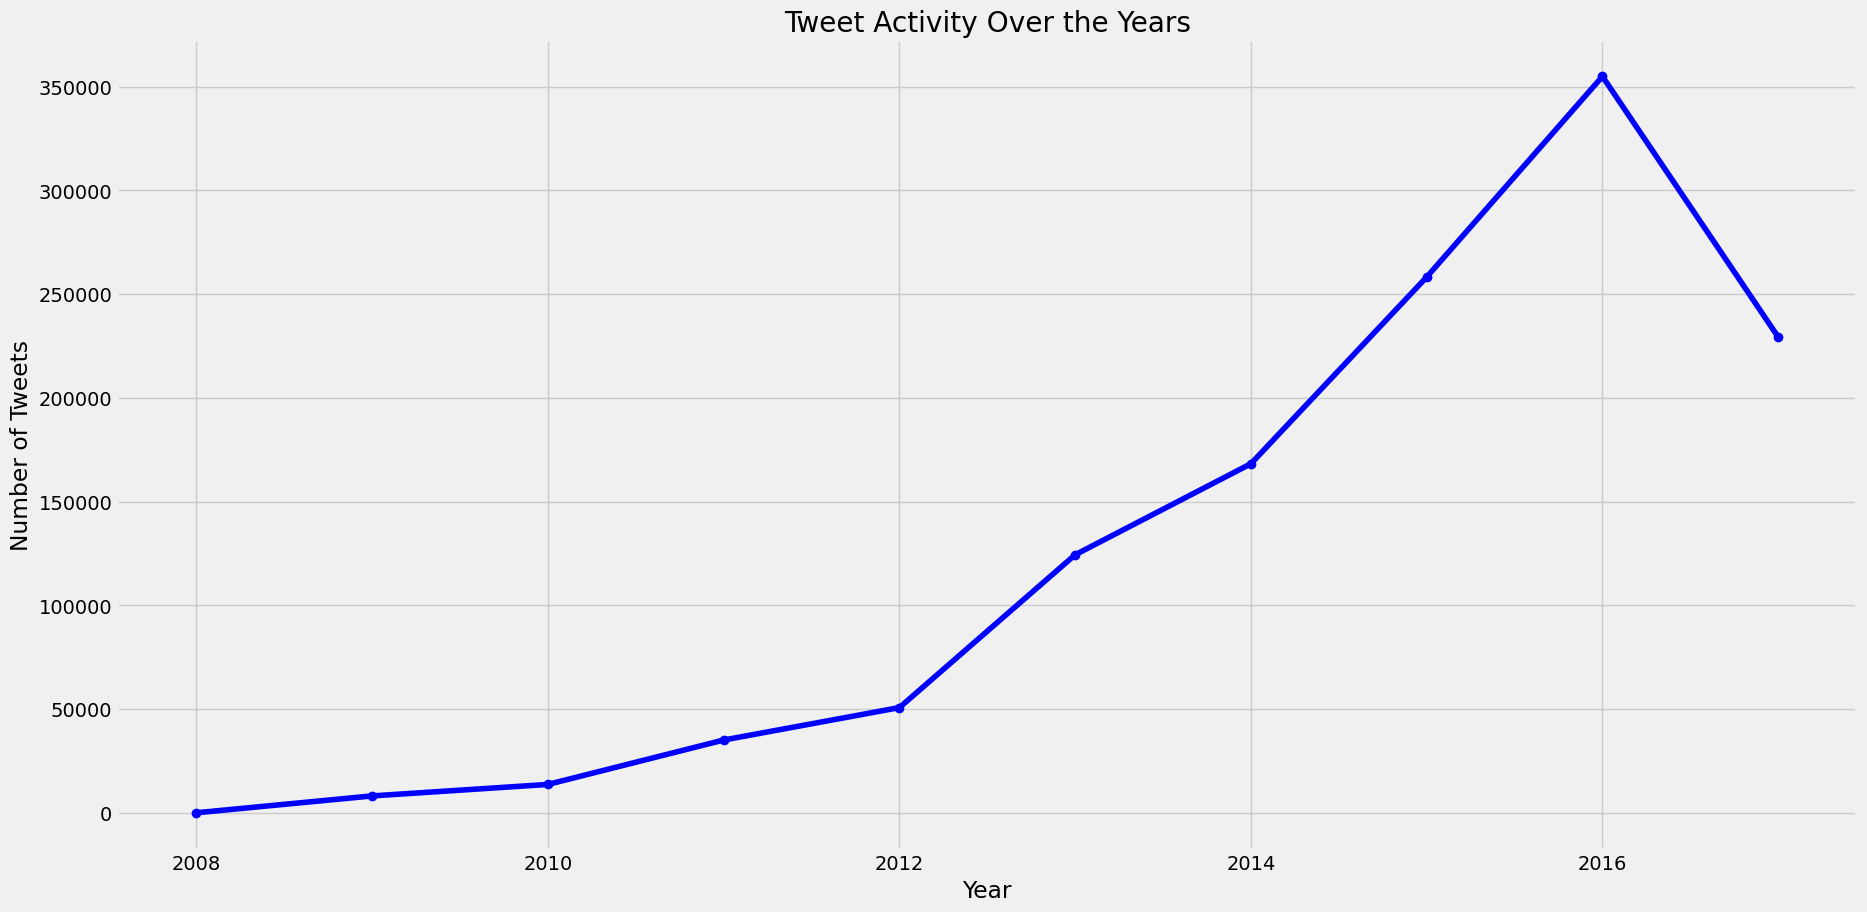

In [31]:
# Tweets Activity Over Years
import pandas as pd
import matplotlib.pyplot as plt

tweet_activity = pd.read_sql_query("SELECT created_at FROM Tweets", conn)
tweet_activity['created_at'] = pd.to_datetime(tweet_activity['created_at'])
tweet_activity = tweet_activity.groupby(tweet_activity['created_at'].dt.year).size()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot(tweet_activity.index, tweet_activity.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Tweet Activity Over the Years', color='black')
plt.grid(True)
plt.show()


### What are the most discussed topics in congressional tweets during the specified period?

#### Hypotheses:
Congressional tweets will cover a wide range of topics, including healthcare, economy, defense, and immigration.

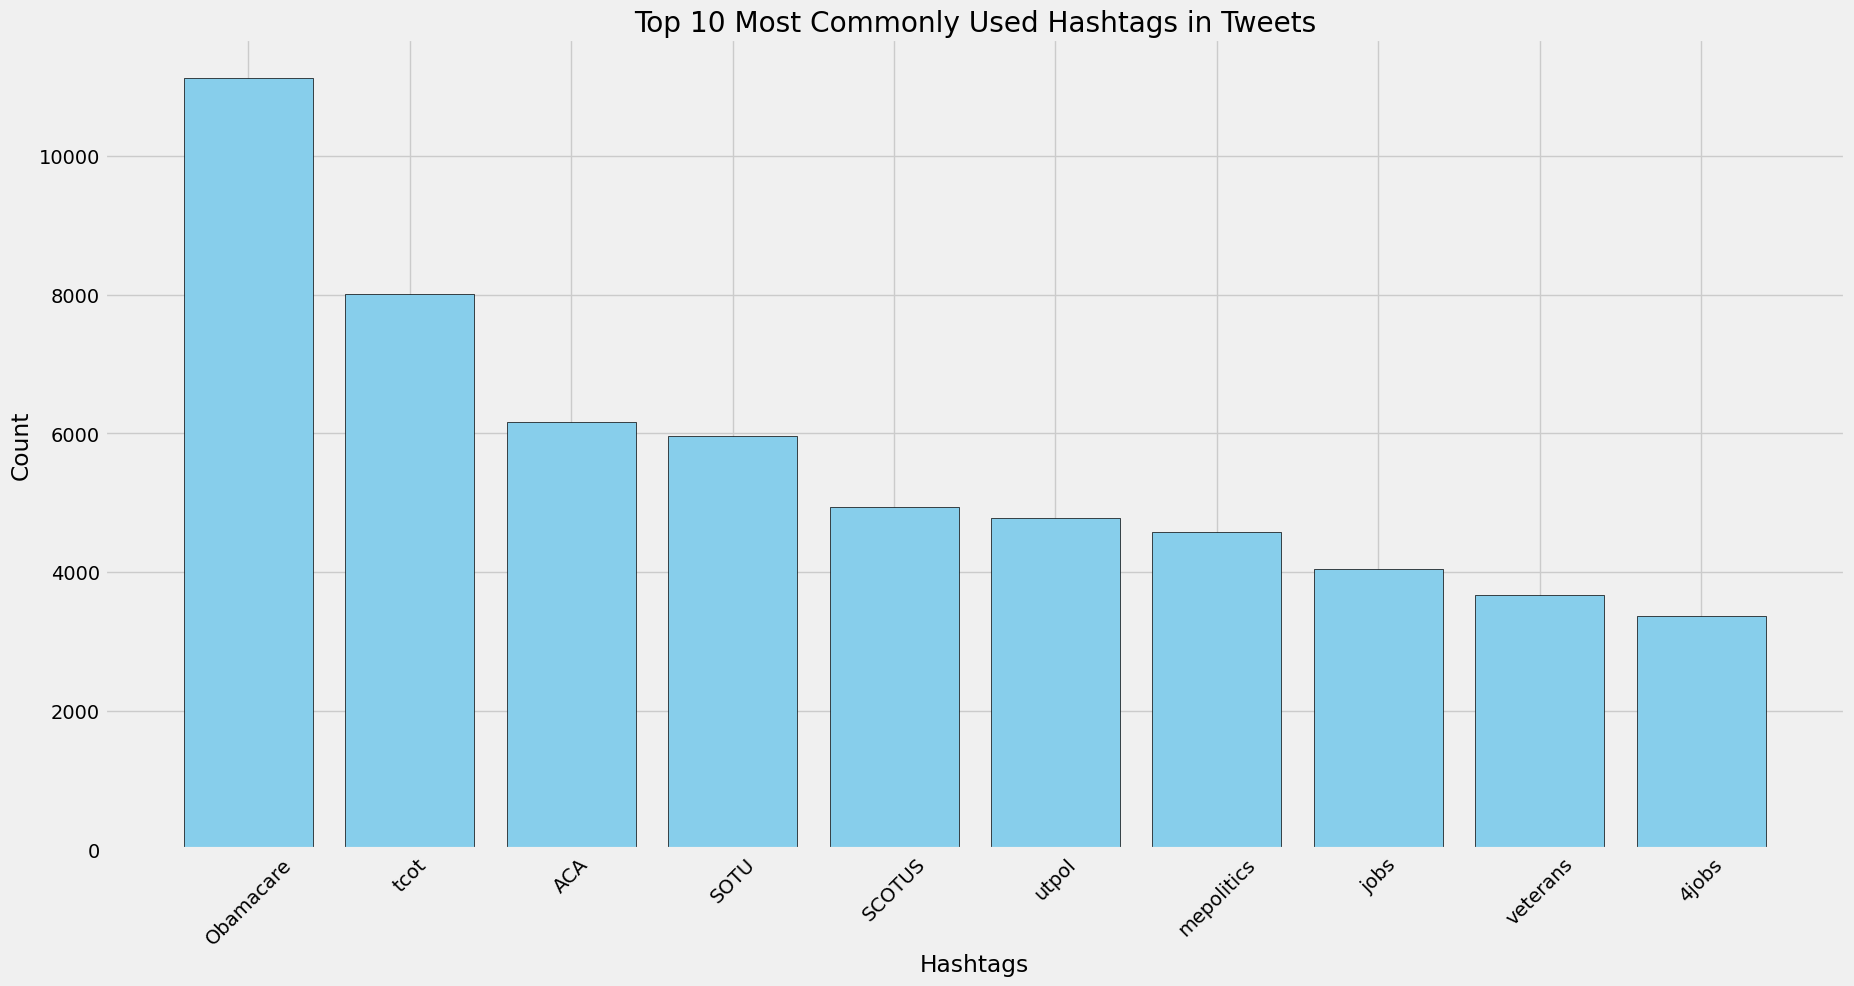

In [32]:
# Retrieve all hashtags and counts
hashtags_df = pd.read_sql_query("SELECT text, count FROM Hashtags ORDER BY count DESC", conn)
top_10_hashtags = hashtags_df.nlargest(10, 'count')

plt.figure(figsize=(20, 10))
plt.bar(top_10_hashtags['text'], top_10_hashtags['count'],color='skyblue', edgecolor='black')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Most Commonly Used Hashtags in Tweets', color='black')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Hypotheses:

Congressional tweets will cover a wide range of topics, including healthcare, economy, defense, and immigration.

1. Obamacare (Affordable Care Act) - Healthcare
2. tcot (Top Conservatives on Twitter) - General conservative topics
3. ACA (Affordable Care Act) - Healthcare
4. SOTU (State of the Union) - Politics and Government
5. SCOTUS (Supreme Court of the United States) - Law and Judiciary
6. utpol (Utah Politics) - Local politics
7. mepolitics (Maine Politics) - Local politics
8. jobs - Economy and Employment
9. veterans - Military and Veterans Affairs
10. 4jobs (For Jobs) - Economy and Employment

As we can see, the hashtags cover various topics such as healthcare, economy, defense, politics, law, and local politics. This supports the initial hypothesis that congressional tweets indeed cover a wide range of topics, including healthcare, economy, defense, and immigration. The presence of hashtags related to specific policy topics and political events also indicates that congressional discussions on Twitter encompass diverse subjects and are not limited to a particular theme.

In [48]:
# Let's explore who uses the top 10 most common tags
query = """
SELECT u.screen_name, t.usage_count
FROM Users u
JOIN (
    SELECT t.user_id, COUNT(*) AS usage_count
    FROM Tweets t
    JOIN TweetHashtags th ON t.tweet_id = th.tweet_id
    WHERE th.hashtag_id IN (
        SELECT hashtag_id
        FROM Hashtags
        ORDER BY count DESC
        LIMIT 10)
    GROUP BY t.user_id
    ORDER BY COUNT(*) DESC
) t ON u.user_id = t.user_id;
"""
users = pd.read_sql_query(query, conn)

users.head(20)

screen_name  usage_count
0     senorrinhatch         2011
1   Governor_LePage         1502
2        GovHerbert         1378
3       RepHuizenga         1305
4   RepChrisStewart         1212
5    chelliepingree         1021
6        SenMikeLee          942
7      SenAngusKing          917
8   RepJBridenstine          686
9    SenatorCollins          683
10      RepPoliquin          668
11   RepKenMarchant          587
12    RepDianeBlack          579
13  RepMikeRogersAL          579
14     RepJoeBarton          566
15  SenJohnBarrasso          509
16     RepSamGraves          509
17     RepTomGraves          503
18   RepTrentFranks          461
19        TomRooney          461

Let's use Natural Language Processing to find what are the most common words and see if we can find themes

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [50]:
tweets_text = pd.read_sql_query('SELECT text FROM Tweets', conn)

In [52]:
all_tweets_text = ' '.join(tweets_text['text'])

# Tokenize text
tokens = word_tokenize(all_tweets_text)
tokens = [token.lower() for token in tokens]
tokens = [token for token in tokens if token.isalpha()]

# Remove stop words and chosen words
stop_words = set(stopwords.words('english'))
chosen_words = set(["http", "https", "rt", "amp"])

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Filter out words
tokens = [token for token in tokens if token not in stop_words and token not in chosen_words]

# Lemmatize tokens
tokens = [lemmatizer.lemmatize(token) for token in tokens]

freq_dist = FreqDist(tokens)

In [53]:
freq_dist.most_common(50)

[('today', 117483),
 ('great', 71706),
 ('bill', 54041),
 ('american', 49952),
 ('house', 48063),
 ('u', 47113),
 ('new', 45570),
 ('day', 45330),
 ('thanks', 44524),
 ('job', 42184),
 ('thank', 41743),
 ('family', 39187),
 ('need', 38985),
 ('time', 38630),
 ('work', 38481),
 ('support', 37255),
 ('year', 36669),
 ('help', 36560),
 ('act', 36544),
 ('state', 36524),
 ('congress', 33157),
 ('health', 31682),
 ('watch', 30673),
 ('must', 30022),
 ('president', 29858),
 ('proud', 29300),
 ('people', 28912),
 ('woman', 28887),
 ('student', 28301),
 ('join', 27596),
 ('week', 27570),
 ('live', 26836),
 ('vote', 26424),
 ('happy', 26275),
 ('make', 26264),
 ('community', 25650),
 ('see', 25411),
 ('veteran', 24981),
 ('right', 24779),
 ('care', 24776),
 ('senate', 24548),
 ('one', 24458),
 ('good', 24444),
 ('get', 24420),
 ('morning', 24290),
 ('service', 23833),
 ('office', 23641),
 ('read', 23290),
 ('obamacare', 22610),
 ('hearing', 22516)]

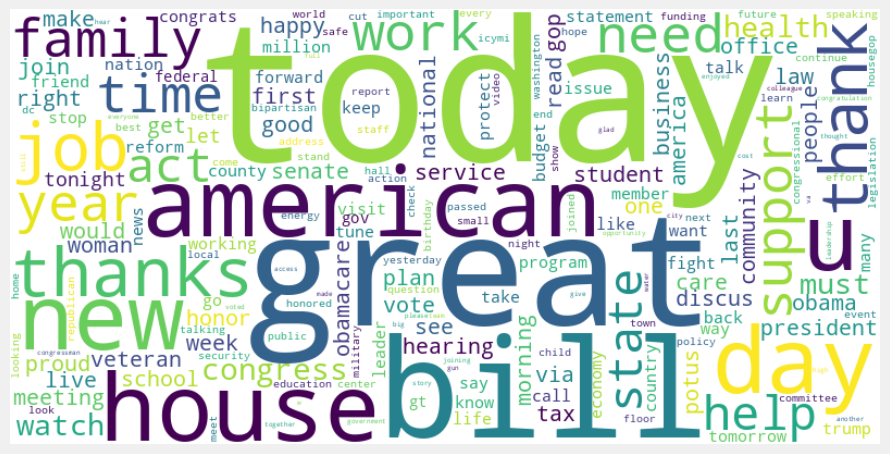

In [54]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Common topics and themes accross all tweets

1. **Legislation and Congress-Related Keywords:**
   - bill, act, congress, house, senate, vote, hearing
   - These terms are directly related to legislative processes and activities in Congress.

2. **Political Statements and Discussions:**
   - great, american, u (possibly referring to "United States"), president, people, right
   - These words are commonly used in political discussions, expressing opinions, and discussing government matters.

3. **Public Services and Support:**
   - support, help, care, community, service, veteran
   - These words may relate to discussions about public services, community support, and veterans' issues.

4. **Social Issues and Equality:**
   - woman, student, proud, equality
   - These terms could indicate discussions about women's rights, education, and social equality.

5. **Healthcare and Policy:**
   - health, obamacare
   - These words could be related to discussions about healthcare policies and the Affordable Care Act (Obamacare).

6. **Job and Economy:**
   - job, work, year, economy
   - These terms may relate to discussions about employment, economic conditions, and job-related policies.

7. **Thankfulness and Positivity:**
   - thanks, thank, happy, great
   - While these words are not directly related to legislative topics, they may appear in positive discussions or expressions of gratitude from constituents.

8. **Engagement and Participation:**
   - join, watch, live, read
   - These words could refer to calls for engagement, participation in events, and staying informed.

9. **Familial and Community References:**
   - family, time, week, morning, day
   - These terms could be used to discuss personal experiences and community events.

10. **State and Local References:**
    - state, office
    - These words could refer to state-level matters and interactions with public offices.

In [66]:
# Get the date and tweet text from database to frequency of words by year

twt_text_year = pd.read_sql_query('SELECT text, created_at FROM Tweets', conn)
twt_text_year['created_at'] = pd.to_datetime(twt_text_year['created_at'])
group_tweets = twt_text_year.groupby(twt_text_year['created_at'].dt.year)

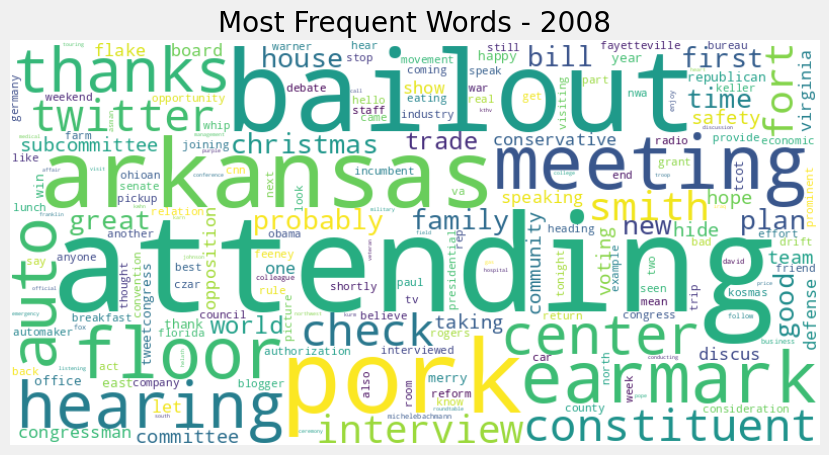

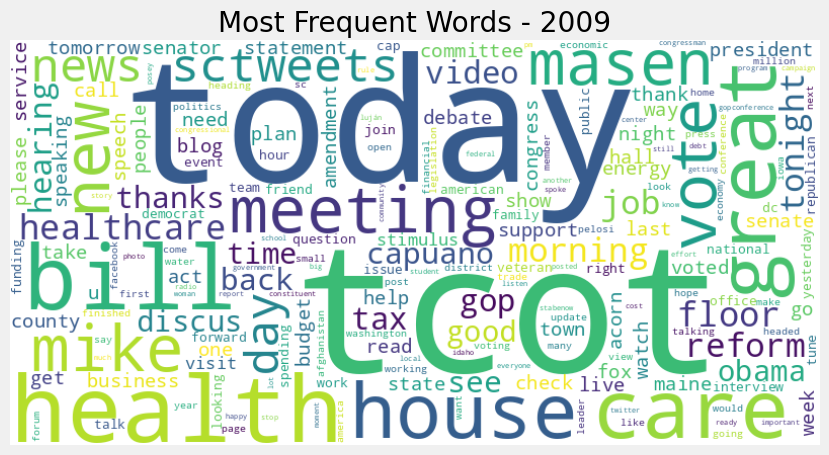

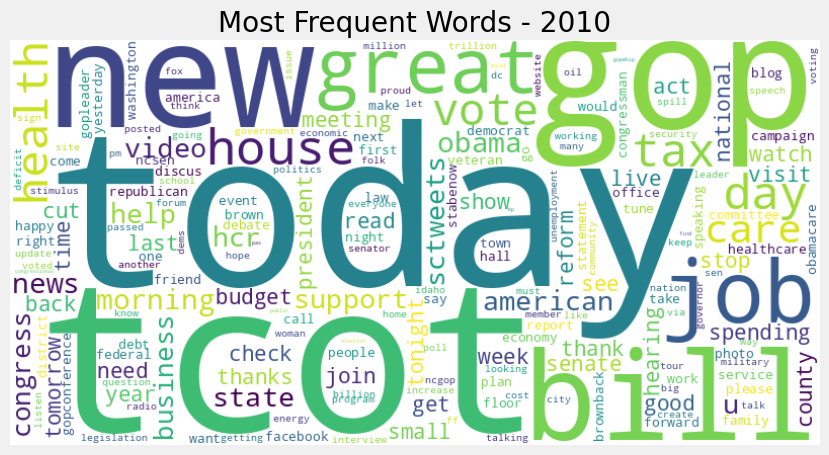

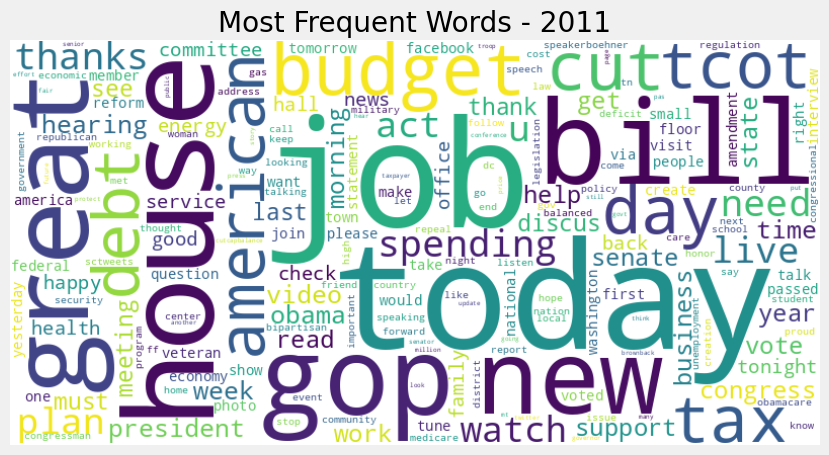

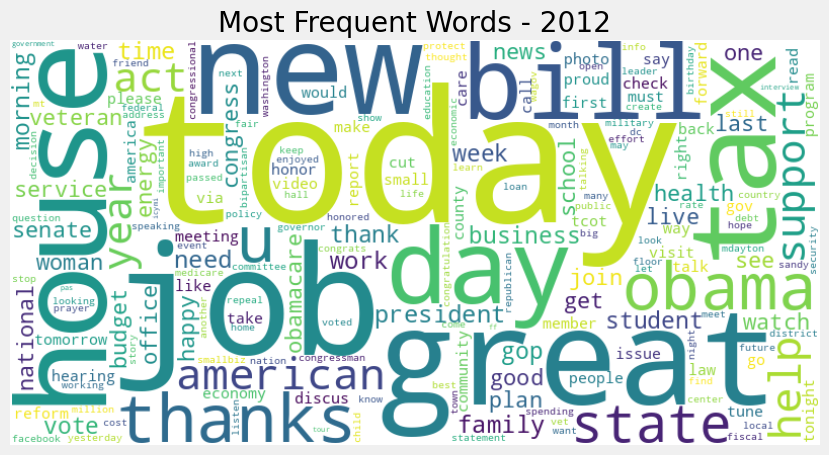

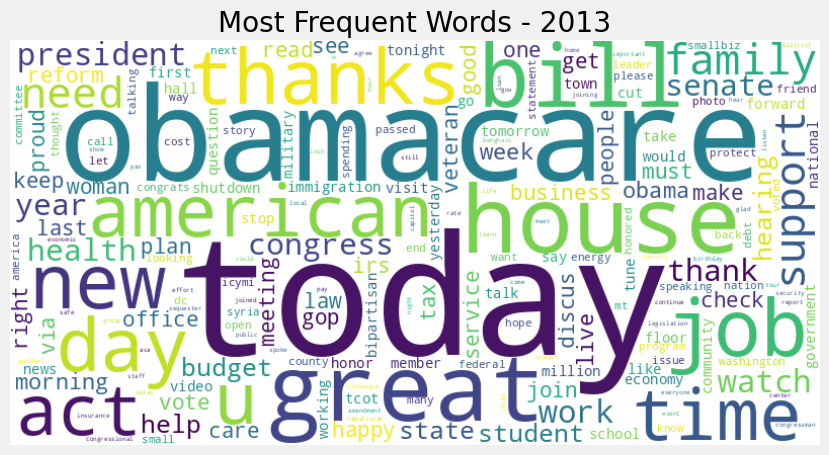

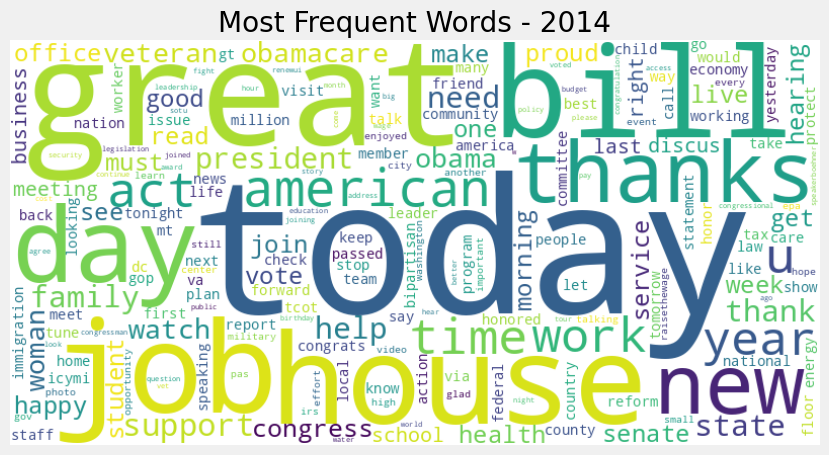

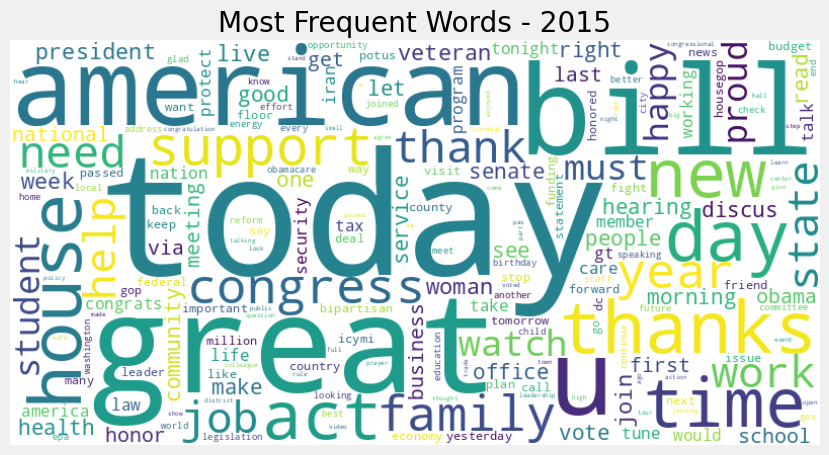

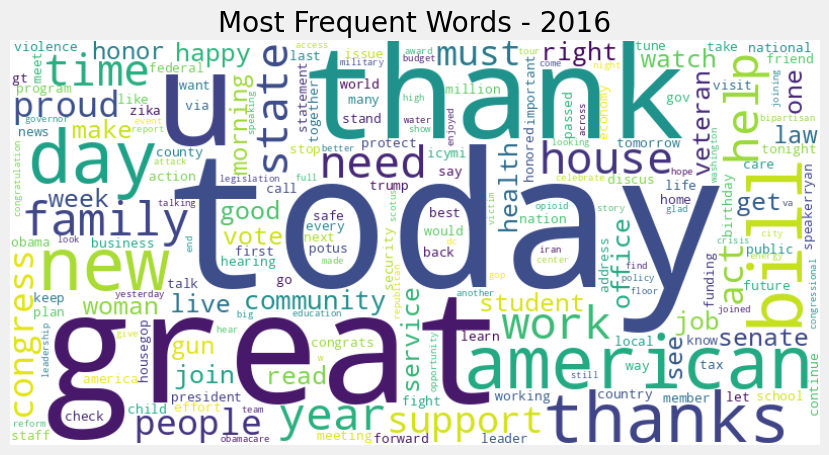

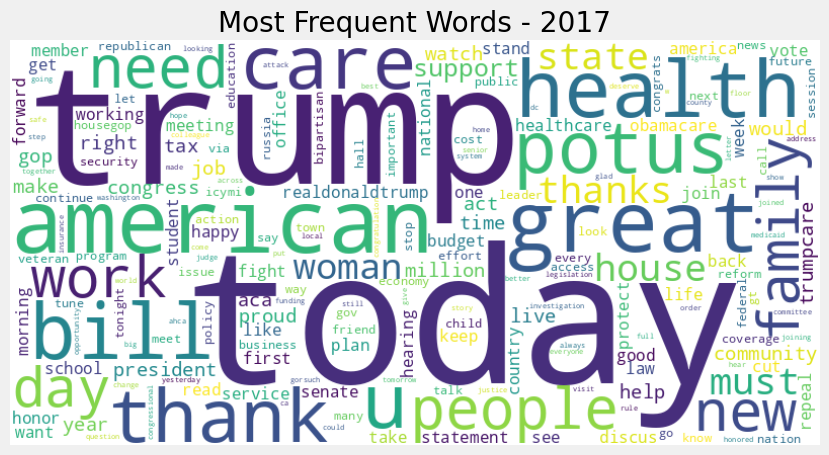

In [71]:
# Custom list of stop words specific to your data
stop_words = set(stopwords.words('english'))
custom_stop_words = set(["http", "https", "rt", "amp"])

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for year, group in group_tweets:
    # Combine all the text for the year into a single string
    text = ' '.join(group['text'])
    
    # Tokenize text
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove custom stop words
    tokens = [token for token in tokens if token not in stop_words and token not in custom_stop_words]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Count the frequency of each word
    freq_dist = FreqDist(tokens)
    
    # Create a word cloud for the year
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Most Frequent Words - {year}", color='black')
    plt.axis('off')
    plt.show()

#### Perform Sentiment Analysis of tweets using the VADER model

In [72]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
tweet_data = pd.read_sql_query('SELECT tweet_id, text FROM tweets', conn)

In [76]:
vader_res = {}
for i in tqdm(range(len(tweet_data))):
    text = tweet_data['text'][i]
    id = tweet_data['tweet_id'][i]
    vader_res[id] = sia.polarity_scores(text)

  0%|          | 0/1243370 [00:00<?, ?it/s]

In [77]:
# Conver vader_res to a DF
tweets_scores = pd.DataFrame(vader_res).T
tweets_scores = tweets_scores.reset_index().rename(columns={'index': 'tweet_id'})

In [84]:
tweets_scores

tweet_id   neg   neu   pos  compound
0                 877418565 0.000 1.000 0.000     0.000
1                 879618172 0.000 1.000 0.000     0.000
2                 879695803 0.000 1.000 0.000     0.000
3                 880393665 0.000 1.000 0.000     0.000
4                 880474266 0.000 1.000 0.000     0.000
...                     ...   ...   ...   ...       ...
1243365  872139777444917249 0.262 0.738 0.000    -0.751
1243366  872139786378780677 0.080 0.920 0.000    -0.273
1243367  872139844717338624 0.104 0.803 0.093    -0.057
1243368  872140013416443906 0.000 0.734 0.266     0.700
1243369  872140026737336320 0.185 0.815 0.000    -0.527

[1243370 rows x 5 columns]

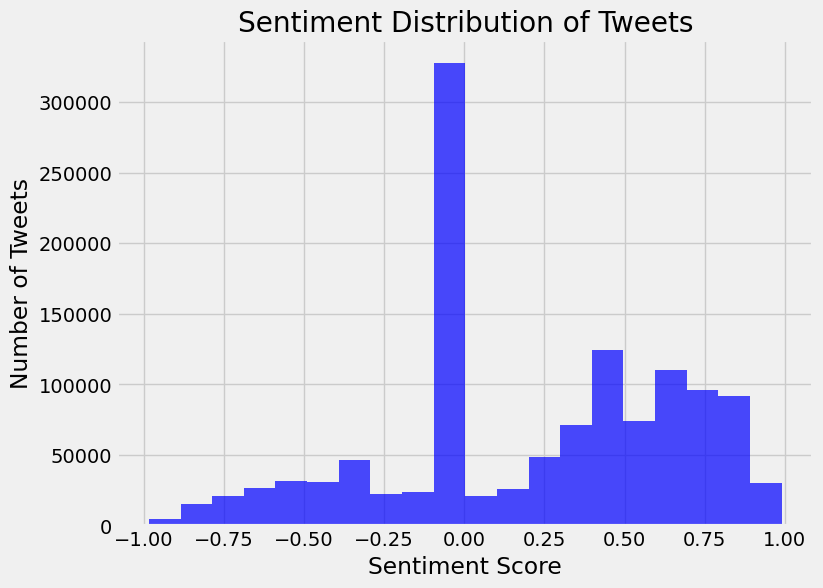

In [81]:
# Plot the sentiment distribution as a histogram
plt.figure(figsize=(8, 6))
plt.hist(tweets_scores['compound'], bins=20, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution of Tweets')

# Show the plot
plt.show()


In [90]:
# Check tweets with less than -0.05 compound score

filtered_scores = tweets_scores[tweets_scores['compound'] < -0.05]
filtered_tweet_ids = filtered_scores['tweet_id']
neg_tweets = pd.read_sql_query(f"SELECT text FROM Tweets WHERE tweet_id IN ({','.join(map(str,filtered_tweet_ids))})" , conn)
neg_tweets.head(10)

text
0                                                          Meeting with Emergency Management officials from Johnson, Pope and Franklin counties
1                                 Attending a Foreign Relations Committee Hearing on US-Russia Relations in the Aftermath of the Georgia Crisis
2  I'd tell you to hide your wallet, but it's probably too late. This will likely be a very bad week. Will keep you updated as the slog goes on
3                       Will be heading the the conservative bloggers briefing today to discuss porkparade.com and the 'Bailout Congress' #pork
4                           I'm speaking on the floor shortly to in opposition to an effort to hide earmarks in the defense authorization bill.
5                      I'm speaking on the floor shortly to in opposition to an effort to hide earmarks in the defense authorization bill #pork
6                                                                                      I'm speaking on House floor soon opposing bailout. #pork
7                                   [staff] Congressman Flake's speech on the floor urging opposition to the bailout: http://tinyurl.com/4b4g9t
8           Banks, the auto industry, now the ethanol industry wants a bailout. http://www.reason.com/blog/show/129627.html  where does it end?
9  Settling in to the "War Room" having just finished initial TV interviews. Indiana/Kentucky results starting to drift in. Next hour exciting!

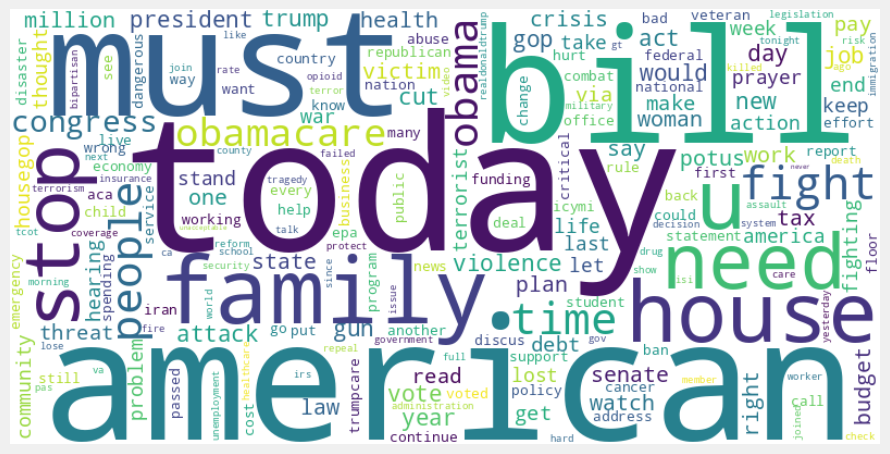

In [91]:
all_neg_tweets = ' '.join(neg_tweets['text'])

# Tokenize text
tokens = word_tokenize(all_neg_tweets)
tokens = [token.lower() for token in tokens]
tokens = [token for token in tokens if token.isalpha()]

# Remove stop words and chosen words
stop_words = set(stopwords.words('english'))
chosen_words = set(["http", "https", "rt", "amp"])

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Filter out words
tokens = [token for token in tokens if token not in stop_words and token not in chosen_words]

# Lemmatize tokens
tokens = [lemmatizer.lemmatize(token) for token in tokens]

freq_dist = FreqDist(tokens)

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Most common words in tweets with a sentiment scores of less than 0.05

1. today: 16872
2. american: 13603
3. bill: 11843
4. must: 10527
5. family: 10520
6. house: 10430
7. u: 10062
8. stop: 8828
9. need: 8638
10. fight: 8606
11. time: 8353
12. people: 8236
13. obama: 7821
14. obamacare: 7797
15. congress: 7783
16. president: 7495
17. gun: 7457
18. act: 7400
19. cut: 7382
20. new: 7268


In [92]:
# Check tweets with positive sentiment score > 0.05
filtered_scores = tweets_scores[tweets_scores['compound'] > 0.05]
filtered_tweet_ids = filtered_scores['tweet_id']

pos_tweets = pd.read_sql_query(f"SELECT text FROM tweets WHERE tweet_id IN ({','.join(map(str,filtered_tweet_ids))})", conn)

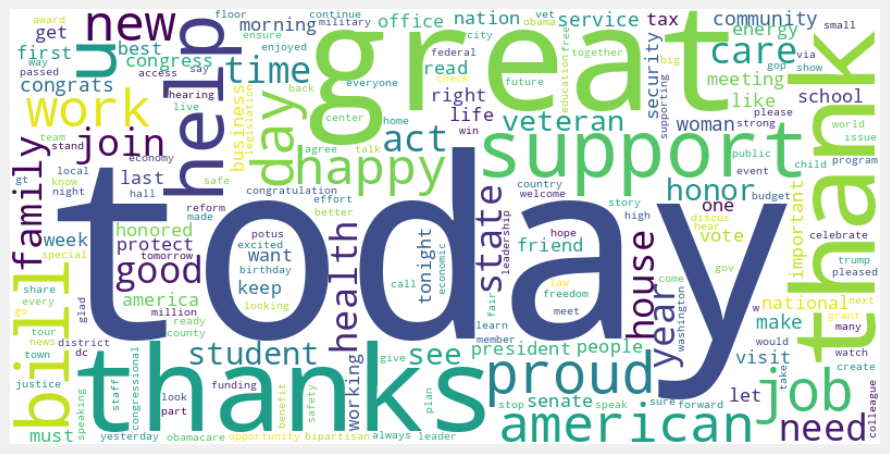

In [93]:
all_pos_tweets = ' '.join(pos_tweets['text'])

# Tokenize text
tokens = word_tokenize(all_pos_tweets)
tokens = [token.lower() for token in tokens]
tokens = [token for token in tokens if token.isalpha()]

# Remove stop words and chosen words
stop_words = set(stopwords.words('english'))
chosen_words = set(["http", "https", "rt", "amp"])

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Filter out words
tokens = [token for token in tokens if token not in stop_words and token not in chosen_words]

# Lemmatize tokens
tokens = [lemmatizer.lemmatize(token) for token in tokens]

freq_dist = FreqDist(tokens)

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Most common words in tweets with a sentiment scores greater than 0.05

1. today: 71594
2. great: 70670
3. thanks: 43175
4. thank: 40024
5. support: 33750
6. help: 32444
7. u: 29133
8. bill: 28454
9. proud: 27960
10. day: 27837
11. job: 27761
12. american: 27638
13. work: 26884
14. new: 26109
15. happy: 26017
16. join: 23978
17. family: 23844
18. good: 22560
19. house: 22289
20. care: 22123

### Which members of Congress are the most active on Twitter and engage with legislative topics?

#### Hypothesis: Influential members of Congress, committee chairs, and leaders are expected to be more active on Twitter and have higher engagement with tweets related to legislation.

In [98]:
# Retrieve tweets id with key words realted to legislative topics and congress
query = """
SELECT screen_name, COUNT(*) AS num_twts
FROM Users
JOIN Tweets ON Users.user_id = Tweets.user_id
WHERE text LIKE '%legislation%'
    OR text LIKE '%bill%'
    OR text LIKE '%law%'
    OR text LIKE '%act%'
    OR text LIKE '%congress%'
    OR text LIKE '%senate%'
    OR text LIKE '%house%'
    OR text LIKE '%representative%'
    OR text LIKE '%senator%'
    OR text LIKE '%policy%'
    OR text LIKE '%government%'
    OR text LIKE '%politics%'
    OR text LIKE '%committee%'
    OR text LIKE '%vote%'
    OR text LIKE '%session%'
    OR text LIKE '%hearing%'
    OR text LIKE '%debate%'
    OR text LIKE '%amendment%'
    OR text LIKE '%caucus%'
    OR text LIKE '%lobby%'
    OR text LIKE '%judiciary%'
    OR text LIKE '%oversight%'
    OR text LIKE '%bipartisanship%'
    OR text LIKE '%partisan%'
    OR text LIKE '%chamber%'
GROUP BY Tweets.user_id
ORDER BY num_twts DESC
"""

tweets_filtered = pd.read_sql_query(query, conn)

In [101]:
tweets_filtered

screen_name  num_twts
0       RepCummings      2010
1      RepHalRogers      1796
2      SenatorLeahy      1756
3     SenWhitehouse      1733
4         GOPLeader      1724
..              ...       ...
539  collinpeterson        33
540         RepTrey        31
541     RepRonEstes         6
542     RepGonzalez         6
543      GregHarper         1

[544 rows x 2 columns]

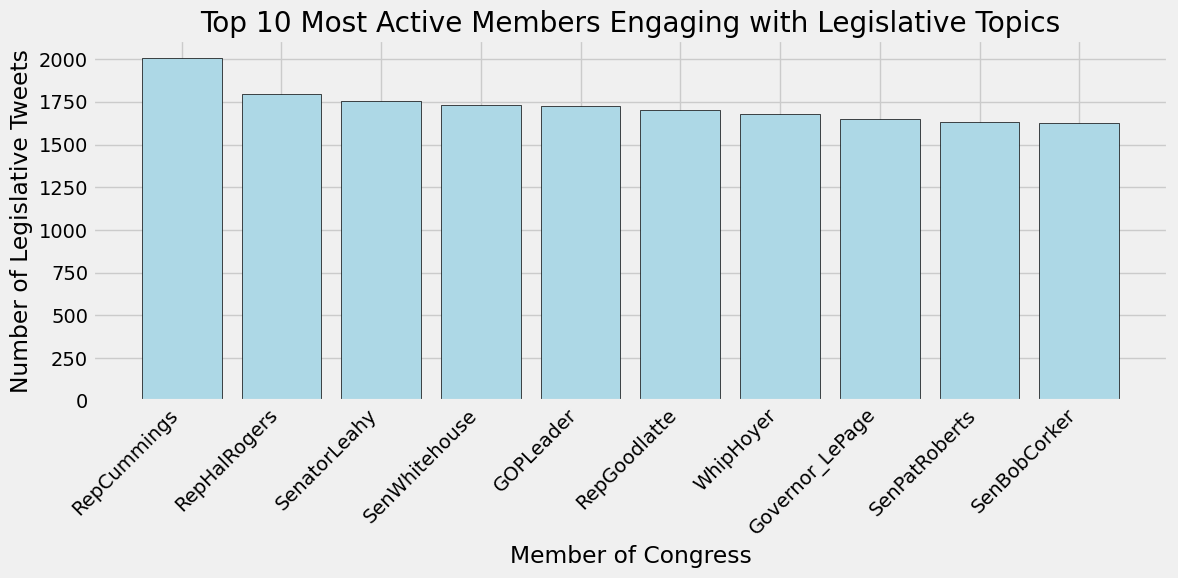

In [110]:
# Plot bar chart for the most active members engaging with legislative topics
plt.figure(figsize=(12, 6))
plt.bar(tweets_filtered['screen_name'].head(10), tweets_filtered['num_twts'].nlargest(10), color='lightblue', edgecolor='black')
plt.xlabel('Member of Congress')
plt.ylabel('Number of Legislative Tweets')
plt.title('Top 10 Most Active Members Engaging with Legislative Topics')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Are there any significant connections or relationships between members based on their interactions on Twitter?
#### Hypothesis: Social network analysis might reveal clusters of members who frequently interact or retweet each other, indicating potential alliances or affiliations.

In [152]:
import networkx as nx

# Retrieve all tweets that have RT @ in it
query = """
    SELECT screen_name, T.tweet_id, T.user_id, T.text
    FROM Users
    JOIN Tweets T ON Users.user_id = t.user_id
    WHERE T.text LIKE '%RT @%'
"""
rt_df = pd.read_sql_query(query, conn)

# Create a directed graph to represent retweet relationships
G = nx.DiGraph()

# Add members of congress to the graph
G.add_nodes_from(rt_df['screen_name'].unique())

In [153]:
for _, row in rt_df.iterrows():
    source_user = row['screen_name']
    tweet_text = row['text']

    try:
        if '@' in tweet_text:
            # Split the tweet text by '@' and get the second part
            after_at = tweet_text.split('@')[1]
        
            # Split the part after '@' by space or colon and get the first element
            retweeted_user = after_at.split()[0].split(':')[0]
            if retweeted_user in G.nodes:
                G.add_edge(source_user, retweeted_user)
    except IndexError:
        print(tweet_text)

And looking forward to it! RT @@ENR_GOP @lisamurkowski to speak on energy trade @BrookingsFP January 7th. http://t.co/eXO5MRvqN0


In [205]:
degree_centrality = nx.degree_centrality(G)
# Sort members based on their degree centrality (number of retweets)
sorted_members = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Extract the top members with the highest degree centrality (most retweets)
top_members = sorted_members[:10]

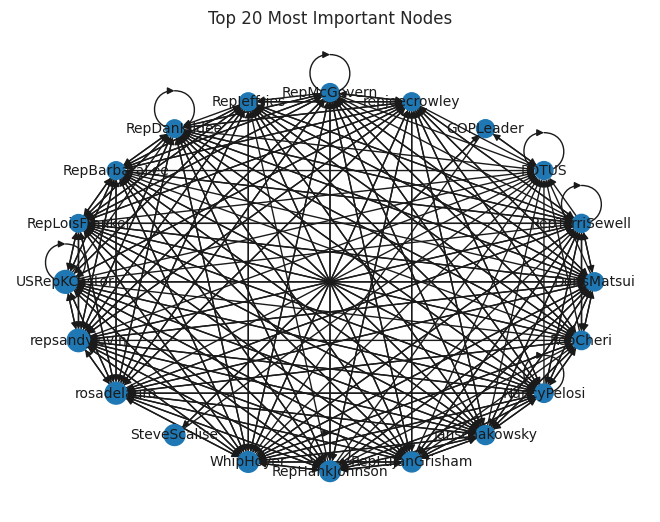

In [206]:
# Calculate the degree centrality for the top nodes in the subgraph
top_degree_centrality = {node: degree_centrality[node] for node in top_nodes}

# Calculate node sizes based on degree centrality for the top nodes
node_sizes = [top_degree_centrality[node] * 500 for node in top_nodes]

# Draw the subgraph with labels and adjusted node sizes
pos = nx.shell_layout(subgraph)  # Adjust k parameter
nx.draw(subgraph, pos, with_labels=True, node_size=node_sizes, font_size=10)

plt.title('Top 20 Most Important Nodes')
plt.show()


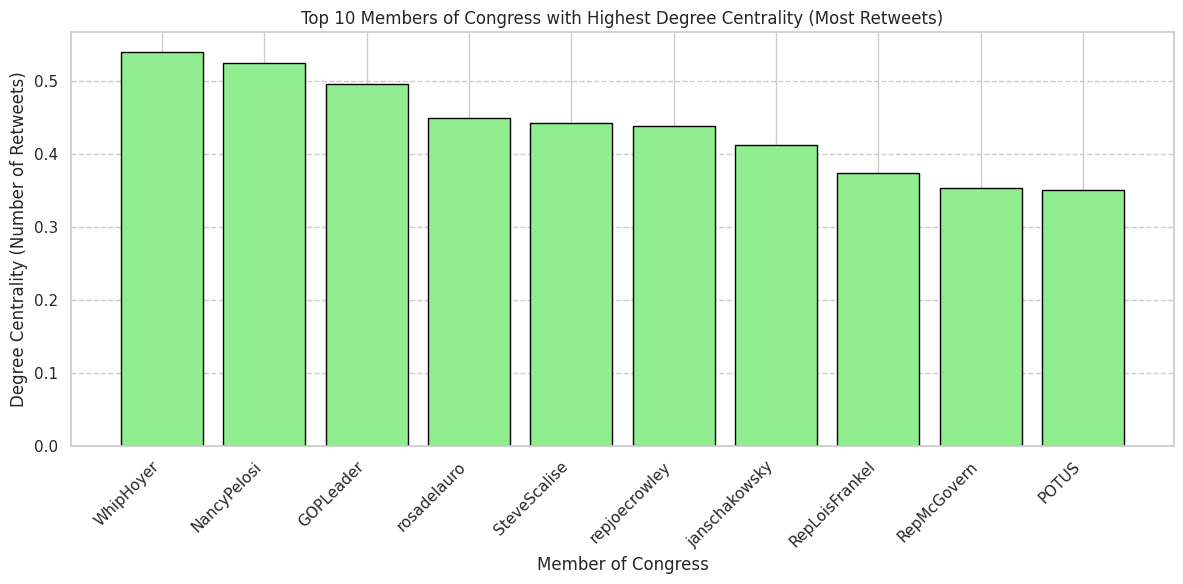

In [207]:
# Create a DataFrame for visualization
top_members = pd.DataFrame(top_members, columns=['Member of Congress', 'Degree Centrality'])

# Plot bar chart for the top 10 members with the highest degree centrality (most retweets)
plt.figure(figsize=(12, 6))
plt.bar(top_members['Member of Congress'], top_members['Degree Centrality'], color='lightgreen', edgecolor='black')
plt.xlabel('Member of Congress')
plt.ylabel('Degree Centrality (Number of Retweets)')
plt.title('Top 10 Members of Congress with Highest Degree Centrality (Most Retweets)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Degree centrality measures how well-connected a node is to other nodes in a network. In the context of a social network or interaction graph, a higher degree centrality indicates that a node (in this case, a Member of Congress) is more connected or interacts more frequently with other nodes. 	

Member of Congress	Degree Centrality
1. WhipHoyer	0.540
2. NancyPelosi	0.525
3. GOPLeader	0.495
4. rosadelauro	0.449
5. SteveScalise	0.442
6. repjoecrowley	0.438
7. janschakowsky	0.413
8. RepLoisFrankel	0.374
9. RepMcGovern	0.354
10. POTUS	0.350

## TO DO:
- vIZ OF USERS LISTED COUNT, AND OTHER COLUMNS